In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# B-Spline basic function definition
# It requires input i=,k=Degree of the function and u values which are knot values divided for generating curve
def N(i,k,u):
    #This has to be generated from knot vector function. Here its written manually
    #t=np.array([0., 0., 0., 1., 2., 3., 4., 4.,4.])
    if k==0:
        if t[i] <= u < t[i+1]:
            return 1
        else:
            return 0
    else:
        # If else loop is used to avoid division by zero.
        if (t[i+k]-t[i]) == 0:
            first_term=0
        else:
            first_term = ((u-t[i])*(N(i,k-1,u))/(t[i+k]-t[i]))
        if (t[i+k+1]-t[i+1]) == 0:
            second_term = 0
        else:
            second_term = ((t[i+k+1]-u)*(N(i+1,k-1,u))/(t[i+k+1]-t[i+1]))
        #return(((u-t[i])*(N(i,k-1,u))/(t[i+k-1]-t[i])) + ((t[i+k]-u)*(N(i+1,k-1,u))/(t[i+k]-t[i+1])))
        return(first_term+second_term)

In [3]:
#Parameters
control_points=7
n=control_points-1
degree=3
number_of_segments=n-(degree+1)+2
#u=np.arange(0,number_of_segments+1,1)

In [14]:
P = np.array([[0.,0.],[2.,0.],[1.,4.],[7.,4.],[5.,-2.],[8.,-2.],[8.,2.]])
t=np.array([0., 0., 0., 0., 1./4., 2./4., 3./4., 1.,1.,1.,1.])
size_of_u = 1000
B_spline=np.zeros((size_of_u,2))
u_values=np.linspace(0,1,size_of_u)
for j,uu in enumerate(u_values):
    b_spline=np.array([0,0])
    for ii in range(np.shape(P)[0]):
        b_spline = b_spline + N(ii,degree,uu)*P[ii]
    B_spline[j] = b_spline
# Due to error we have to equate last term with last control point
B_spline[size_of_u-1]=P[-1]

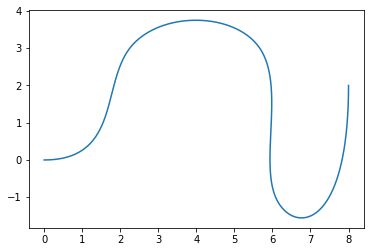

In [15]:
fig,ax=plt.subplots()
x=np.array(B_spline[:,0])
y=np.array(B_spline[:,1])
ax.plot(x,y)